<a href="https://colab.research.google.com/github/Ayisharya/greenai/blob/main/greenai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of dead saplings detected: 128


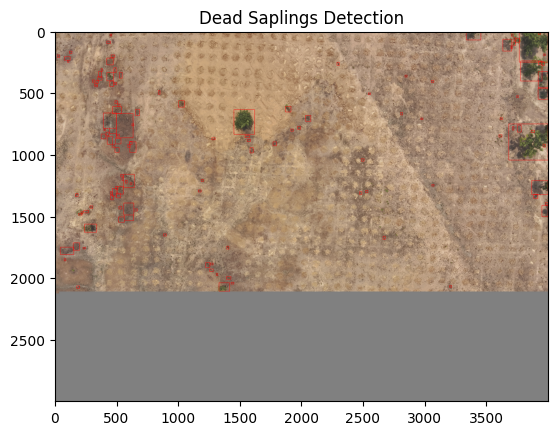

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/DJI_20240608115621_0013_V.JPG')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve thresholding
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply binary thresholding
_, threshold_image = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY_INV)

# Find contours (regions that are likely dead saplings)
contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image to visualize the detected dead saplings
dead_saplings_image = image.copy()
dead_saplings_positions = []

for contour in contours:
    if cv2.contourArea(contour) > 100:  # Filter small areas to avoid noise
        # Draw bounding box around each dead sapling
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(dead_saplings_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red rectangle
        # Append position to list
        dead_saplings_positions.append((x, y, w, h))

# Count the number of dead saplings detected
dead_saplings_count = len(dead_saplings_positions)
print(f"Number of dead saplings detected: {dead_saplings_count}")

# Show the result
plt.imshow(cv2.cvtColor(dead_saplings_image, cv2.COLOR_BGR2RGB))
plt.title('Dead Saplings Detection')
plt.show()


Number of dead saplings detected: 1


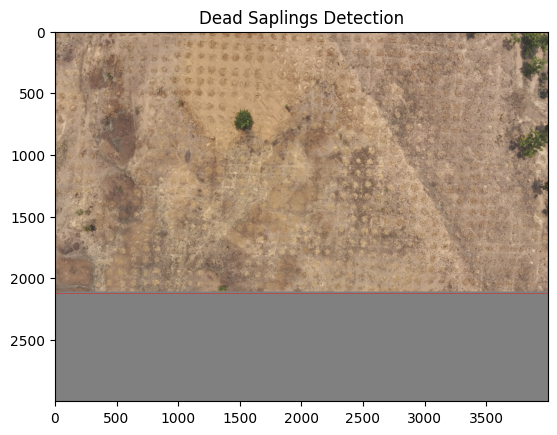

In [ ]:
# Convert to HSV (Hue, Saturation, Value) color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for dead saplings color (e.g., brownish color range)
lower_dead = np.array([10, 50, 50])   # Lower bound for brown color
upper_dead = np.array([40, 255, 255])  # Upper bound for brown color

# Threshold the image to get regions that fall within the dead sapling color range
mask = cv2.inRange(hsv_image, lower_dead, upper_dead)

# Find contours on the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes and count dead saplings as before
dead_saplings_image = image.copy()
dead_saplings_positions = []

for contour in contours:
    if cv2.contourArea(contour) > 100:  # Filter out small noise
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(dead_saplings_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red bounding box
        dead_saplings_positions.append((x, y, w, h))

dead_saplings_count = len(dead_saplings_positions)
print(f"Number of dead saplings detected: {dead_saplings_count}")
plt.imshow(cv2.cvtColor(dead_saplings_image, cv2.COLOR_BGR2RGB))
plt.title('Dead Saplings Detection')
plt.show()


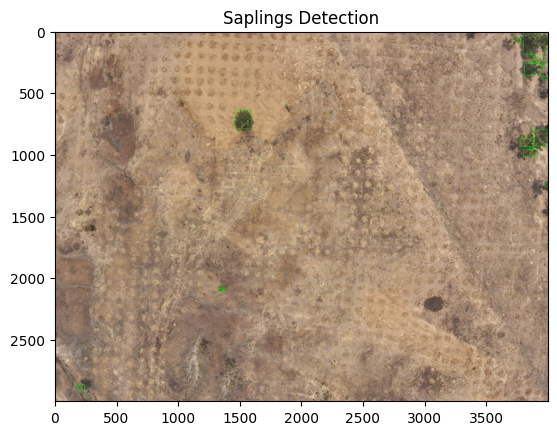

Number of saplings detected: 18


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/DJI_20240608115621_0013_V.JPG')

# Convert to HSV (Hue, Saturation, Value) color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for the color of saplings (for example, light green)
lower_sapling = np.array([30, 50, 50])  # Adjust based on sapling color
upper_sapling = np.array([90, 255, 255])  # Adjust based on sapling color

# Threshold the image to get regions that fall within the sapling color range
mask = cv2.inRange(hsv_image, lower_sapling, upper_sapling)

# Apply some morphological operations to remove noise (optional)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw bounding boxes around saplings
output_image = image.copy()

# Filter out small contours and draw bounding boxes for saplings
saplings_positions = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 200:  # Filter small areas (small saplings)
        # Get bounding box coordinates for each detected sapling
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box
        saplings_positions.append((x, y, w, h))

# Display the results
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Saplings Detection')
plt.show()

# Print the number of detected saplings
print(f"Number of saplings detected: {len(saplings_positions)}")
